In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [39]:
df1_0 = pd.read_csv("01-00.csv", header=None)
df1_5 = pd.read_csv("01-05.csv", header=None)
df1_10 = pd.read_csv("01-10.csv", header=None)
df2_0 = pd.read_csv("02-00.csv", header=None)
df2_5 = pd.read_csv("02-05.csv", header=None)
df2_10 = pd.read_csv("02-10.csv", header=None)

In [40]:
data = pd.concat([df1_0, df1_5, df1_10, df2_0, df2_5, df2_10])
data

,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.225806,0.221774,0.197581,0.181452,0.193548,0.165323,0.193548,0.189516,0.197581,0.141129
1,0.0,0.428571,0.711409,0.763158,0.781818,0.756250,0.698980,0.892405,0.941935,0.937107,...,0.142132,0.266332,0.351485,0.320574,0.310680,0.297561,0.205000,0.158470,0.211340,0.049724
2,0.0,0.428571,0.711409,0.763158,0.781818,0.756250,0.698980,0.892405,0.941935,0.937107,...,0.142132,0.266332,0.351485,0.320574,0.310680,0.297561,0.205000,0.158470,0.211340,0.049724
3,0.0,0.428571,0.711409,0.763158,0.781818,0.756250,0.698980,0.892405,0.941935,0.937107,...,0.142132,0.266332,0.351485,0.320574,0.310680,0.297561,0.205000,0.158470,0.211340,0.049724
4,0.0,0.428571,0.711409,0.763158,0.781818,0.756250,0.698980,0.892405,0.941935,0.937107,...,0.142132,0.266332,0.351485,0.320574,0.310680,0.297561,0.205000,0.158470,0.211340,0.049724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10.0,0.451429,0.455556,0.346939,0.323770,0.342742,0.315789,0.318367,0.325203,0.327935,...,0.176871,0.100719,0.043210,0.038251,0.040936,0.161458,0.360000,0.349727,0.294444,0.373563
57,10.0,0.472826,0.442708,0.341463,0.327801,0.334694,0.368421,0.341463,0.320988,0.340164,...,0.155172,0.090361,0.036364,0.016484,0.016949,0.124352,0.361111,0.372973,0.309783,0.361111
58,10.0,0.488372,0.491620,0.338710,0.315574,0.329317,0.357430,0.330612,0.349794,0.334694,...,0.119048,0.094937,0.049080,0.027624,0.005848,0.146465,0.377049,0.394444,0.335135,0.338983
59,10.0,0.415789,0.394089,0.317073,0.313008,0.340081,0.345528,0.336032,0.333333,0.337349,...,0.128834,0.141104,0.018868,0.032967,0.005814,0.159794,0.389831,0.360656,0.294444,0.357955


In [41]:
X = data.iloc[:, [i for i in range(1, 14401)]]
Y = data.iloc[:, 0]

In [42]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)
X_Train2 = pca.fit_transform(X_Train)
X_Test2 = pca.fit_transform(X_Test)

In [96]:
print(X2)
X2[1]

[[ 1.05841018e+01 -1.05917952e+00]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1.87060185e+01]
 [-1.60089481e+01 -1

array([-16.00894806, -18.70601847])

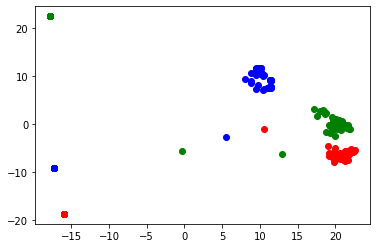

In [112]:
zeroes = []
fives = []
tens = []
for i in range(0, len(Y)):
    if (Y.iloc[i] == 0):
        zeroes.append([X2[i][0], X2[i][1]])
    if (Y.iloc[i] == 5):
        fives.append([X2[i][0], X2[i][1]])
    if (Y.iloc[i] == 10):
        tens.append([X2[i][0], X2[i][1]])

zeroes = np.array(zeroes)
fives = np.array(fives)
tens = np.array(tens)

plt.scatter(zeroes[:, 0], zeroes[:, 1], color="red")
plt.scatter(fives[:, 0], fives[:, 1], color="blue")
plt.scatter(tens[:, 0], tens[:, 1], color="green")

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_Train2, Y_Train)

SVC(kernel='poly', random_state=0)

In [53]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test2)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.9594594594594594

Text(0.5, 1.0, 'SVM Decision Region Boundary')

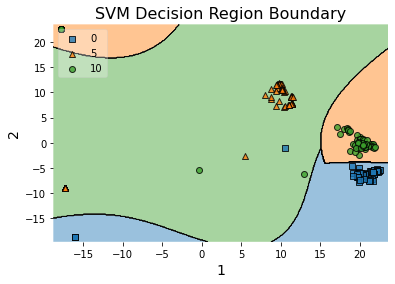

In [62]:
from mlxtend.plotting import plot_decision_regions

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X2, 
                      y=np.array(Y).astype(np.int64),
                      clf=classifier, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)